# Cross Validation Techniques: [2nd June 2025]:

- This is used to evaluate the stability of the ML model.
- It's like how well model performs on **unseen data.**
- Optimizing parameters to the test set can lead information leakage causing the model to perform worse on unseen data so cross validation is used...

## Types of cross-validation:

In [1]:
# importing modules and dataset

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [18]:
data_dict= load_iris()
print(f"Keys: {data_dict.keys()}")

# 
X, y = data_dict.get('data', ''), data_dict.get('target', '')

Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


### 1. K-fold Cross-validation:

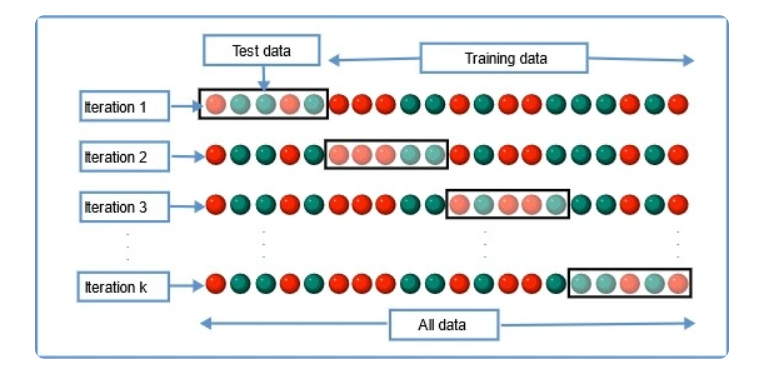

In [35]:
# importing k-fold 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier

k_fold = KFold(n_splits = 10)

model = DecisionTreeClassifier(random_state=0)

score = cross_val_score(
    estimator = model, # model here
    X = X,
    y = y,
    cv = k_fold,
)

# Estimation of accuracy with the help of this helper function.
print(f"Cross Validation Score [k-fold]: {score.mean()}")

Cross Validation Score [k-fold]: 0.9333333333333333


### 2. Stratified k-fold Cross-validation:

- unlike normal k-fold this splits with a uniform prob. distri (i.e. same ratio of target variables)
- perfect for imbalanced dataset...

In [36]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


strat_kf = StratifiedKFold(n_splits = 10)

# Same model with different stratified cross-validation method
score = cross_val_score(
    estimator=model, X=X, y=y,
    cv = strat_kf
)

print(f"Cross Validation Score [stratified K-score]: {score.mean()}")

Cross Validation Score [stratified K-score]: 0.96


### 3. Holdout Cross-validation:

- train_test_split() is basically this one... (70-30 ratio)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# here we have to fit the model then we can achieve thre score as it depends on randomness...
# model.fit(X_train, y_train)
# res = model.predict(X_test)
# can calculate the score using sklearn.metrics.accuracy_score

### 4. Leave-p-out Cross-Validation:

- *p* - samples are used as the validation set.
- *n-p* samples are used as the training set (total *n samples* of dataset).

- Above steps are repeated until the entire dataset of *n samples* gets divided on the validation set of *p samples* [This continues till all samples are used as a validation set]

- High computation time good results (not good for imbalanced dataset)

### 5. Leave-one-out Cross-Validation:

- ONLY *1 - sample point* is used as a validation set & remaining *n-1* samples are used in the training set. 
- (in short p = 1)
- Very computationally expensive.

In [46]:
from sklearn.model_selection import LeavePOut, LeaveOneOut
from sklearn.linear_model import LogisticRegression

lpo = LeavePOut(p = 5)
loo = LeaveOneOut()

lr = LogisticRegression()

# same model check again

scores = {
    'leave_p_out' : cross_val_score(lr, X[:30], y[:30], cv=lpo),
    'leave_1_out' : cross_val_score(lr,X[:30], y[:30], cv = loo)
}

# Interrupting in-between due to so much of time consumption
print(f"Cross Validation Score [Leave-P-Out]: {scores[0].mean()}")
print(f"Cross Validation Score [Leave-One-Out]: {scores[1].mean()}")

ValueError: 
All the 142506 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
142506 fits failed with the following error:
Traceback (most recent call last):
  File "e:\00_SCULPTSOFT\training-internship\Training-Tasks---SculptSoft\2JUNE2025\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\00_SCULPTSOFT\training-internship\Training-Tasks---SculptSoft\2JUNE2025\venv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "e:\00_SCULPTSOFT\training-internship\Training-Tasks---SculptSoft\2JUNE2025\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0


### 6. Monte Carlo Cross-Validation:

- shuffle split cross validation...
- repeated random subsampling cross-validation [data splitting 70-30% / 60-40% / etc...]
- Fit the model on train dataset in that iteration & calculate the accu. of fitted model on test dataset. 
- Repeating this (100-500 or more times) & taking mean of test errors to conclude the model performance.
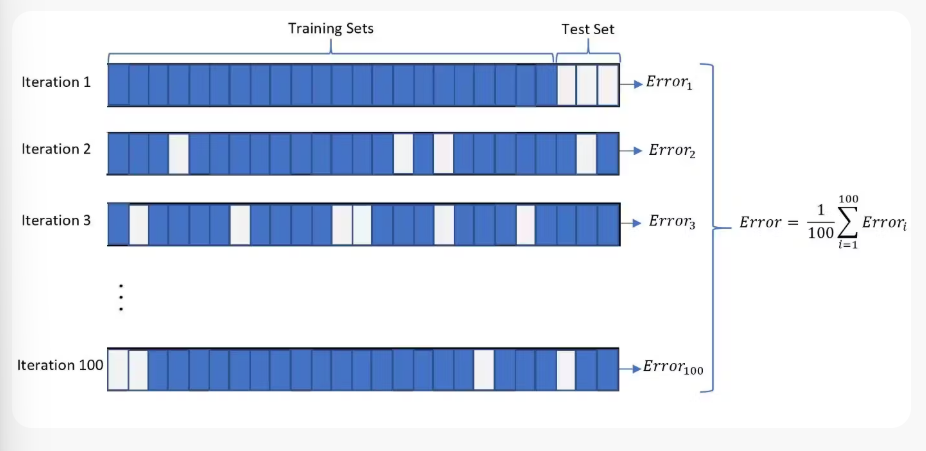

In [41]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size = .3, train_size=.5, n_splits = 10)
score = cross_val_score(model, X, y, cv = shuffle_split)

print(f"Cross Validation Score [Monte Carlo]: {score.mean()}")

Cross Validation Score [Monte Carlo]: 0.9400000000000001


### 7. Time Series (Rolling Cross-Validation / Forward Chaining Method):

- here we can't choose data instances randomly...
- Order is imp. here [data is splitted according to the time]

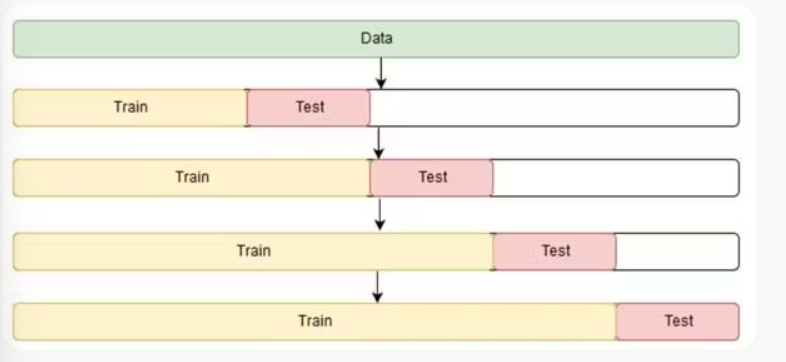

- src: [Turing Blog 🔗](https://www.turing.com/kb/different-types-of-cross-validations-in-machine-learning-and-their-explanations)

In [51]:
from sklearn.model_selection import TimeSeriesSplit

# Sample Time-Series Data:
Price = np.array(
    [
        [1,2],
        [3,4],
        [5,6],
        [1,2],
        [3,4],
        [1,1],
        [2,2]
    ]
)

time = np.arange(1, Price.shape[0]+1)

In [60]:
tscv = TimeSeriesSplit(n_splits = 6)
cnt = 1
for train_idx, test_idx in tscv.split(X):
    print(f"{cnt}. Train: {train_idx}, Test: {test_idx}")
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    cnt += 1

1. Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23], Test: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
2. Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44], Test: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]
3. Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65], Test: [66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86]
4. Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86], Test: [ 87  88  89  90  91  92  93  94  95  96  97  98  99 100 

---
By Kirtan Ghelani @SculptSoft